# Cost Benefit Analysis

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif, chi2
from sklearn.preprocessing import LabelEncoder
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.cluster import DBSCAN, KMeans
from imblearn.over_sampling import SMOTE
from math import *
sns.set()
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV,ElasticNet, ElasticNetCV,LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings(action="ignore")


In [2]:
# reading the csv file into pandas dataframes
df = pd.read_csv('../datasets/cleaned_agg_train_wx.csv')
spray = pd.read_csv('../datasets/cleaned_spray.csv')

In [3]:
#shape of the dataframe
print(df.shape)
print(spray.shape)

(8475, 31)
(14294, 4)


In [4]:
#displaying the first 3 rows of dataframe
pd.set_option('display.max_columns', 100)
df.head(3)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,Station,NumMosquitos,WnvPresent,Sunrise,Sunset,CodeSum,ResultDir,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,AvgSpeed
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,1,0,0421,1917,BR HZ,18,75.433333,51.6,63.733333,5.166667,45.266667,54.033333,3.866667,2.6,0.0,0.059667,29.361333,30.085,8.646667,10.363333
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,1,0,0421,1917,BR HZ,18,75.433333,51.6,63.733333,5.166667,45.266667,54.033333,3.866667,2.6,0.0,0.059667,29.361333,30.085,8.646667,10.363333
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,1,0,0421,1917,BR HZ,18,75.433333,51.6,63.733333,5.166667,45.266667,54.033333,3.866667,2.6,0.0,0.059667,29.361333,30.085,8.646667,10.363333


In [5]:
# converting date column to datetime type
df['Date']=pd.to_datetime(df['Date'])
df['year'] = pd.to_datetime(df['Date']).dt.year
df['month'] = pd.to_datetime(df['Date']).dt.month
df['day'] = pd.to_datetime(df['Date']).dt.day

In [6]:
df.head().T

,0,1,2,3,4
Date,2007-05-29 00:00:00,2007-05-29 00:00:00,2007-05-29 00:00:00,2007-05-29 00:00:00,2007-05-29 00:00:00
Address,"4100 North Oak Park Avenue, Chicago, IL 60634,...","4100 North Oak Park Avenue, Chicago, IL 60634,...","6200 North Mandell Avenue, Chicago, IL 60646, USA","7900 West Foster Avenue, Chicago, IL 60656, USA","7900 West Foster Avenue, Chicago, IL 60656, USA"
Species,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX RESTUANS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS
Block,41,41,62,79,79
Street,N OAK PARK AVE,N OAK PARK AVE,N MANDELL AVE,W FOSTER AVE,W FOSTER AVE
Trap,T002,T002,T007,T015,T015
AddressNumberAndStreet,"4100 N OAK PARK AVE, Chicago, IL","4100 N OAK PARK AVE, Chicago, IL","6200 N MANDELL AVE, Chicago, IL","7900 W FOSTER AVE, Chicago, IL","7900 W FOSTER AVE, Chicago, IL"
Latitude,41.9547,41.9547,41.995,41.9741,41.9741
Longitude,-87.801,-87.801,-87.7693,-87.8248,-87.8248
AddressAccuracy,9,9,9,8,8


In [7]:
# df has information for the following years
df['year'].value_counts()

2007    2775
2013    2012
2009    1915
2011    1773
Name: year, dtype: int64

In [8]:
# dropping years other than 2011 and 2013 as only these years information is present in spray data
df=df[(df['year']==2011)|(df['year']==2013)]

In [9]:
df.head().T

,4690,4691,4692,4693,4694
Date,2011-06-10 00:00:00,2011-06-10 00:00:00,2011-06-10 00:00:00,2011-06-10 00:00:00,2011-06-10 00:00:00
Address,"1100 West Chicago Avenue, Chicago, IL 60642, USA","1700 West 95th Street, Chicago, IL 60643, USA","7500 North Oakley Avenue, Chicago, IL 60645, USA","5800 North Western Avenue, Chicago, IL 60659, USA","5000 South Central Avenue, Chicago, IL 60638, USA"
Species,CULEX TERRITANS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX PIPIENS/RESTUANS,CULEX PIPIENS/RESTUANS
Block,11,17,75,58,50
Street,W CHICAGO,W 95TH ST,N OAKLEY AVE,N WESTERN AVE,S CENTRAL AVE
Trap,T049,T094,T148,T028,T031
AddressNumberAndStreet,"1100 W CHICAGO, Chicago, IL","1700 W 95TH ST, Chicago, IL","7500 N OAKLEY AVE, Chicago, IL","5800 N WESTERN AVE, Chicago, IL","5000 S CENTRAL AVE, Chicago, IL"
Latitude,41.8963,41.7208,42.0174,41.9869,41.8015
Longitude,-87.6552,-87.666,-87.6878,-87.6898,-87.7634
AddressAccuracy,8,9,8,9,9


In [10]:
#final dimension of data
df.shape

(3785, 34)

In [11]:
df['year'].value_counts()

2013    2012
2011    1773
Name: year, dtype: int64

In [12]:
#using kmeans clustering to cluster the locations based on latitude and longitude
km = KMeans(n_clusters=6)
cluster_km = km.fit(df[['Longitude', 'Latitude']])
df['Cluster'] = cluster_km.predict(df[['Longitude', 'Latitude']])

In [13]:
# number of unique clusters formed 
df['Cluster'].value_counts()

4    875
2    783
3    764
0    735
5    374
1    254
Name: Cluster, dtype: int64

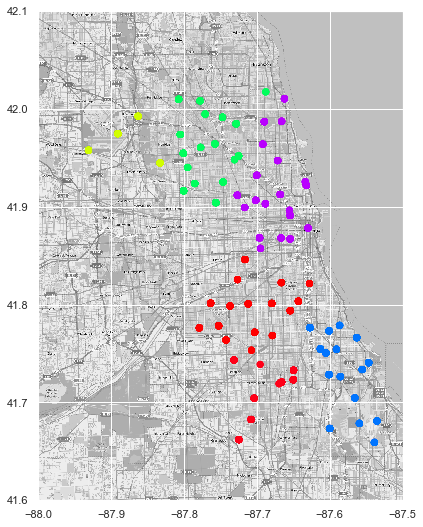

In [14]:
#location of clusters
mapdata = np.loadtxt("../datasets/mapdata_copyright_openstreetmap_contributors.txt")

plt.figure(figsize=(13,9))
lon_lat_box1 = (-88, -87.5, 41.6, 42.1)
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]

plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box1, 
           aspect=aspect)

plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='hsv');

In [15]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [16]:
#converting date column to datetime type
spray['Date']=pd.to_datetime(spray['Date'])

In [17]:
#predicting the clusters in spray data using the kmeans model made earlier
spray['Cluster'] = cluster_km.predict(spray[['Longitude', 'Latitude']])

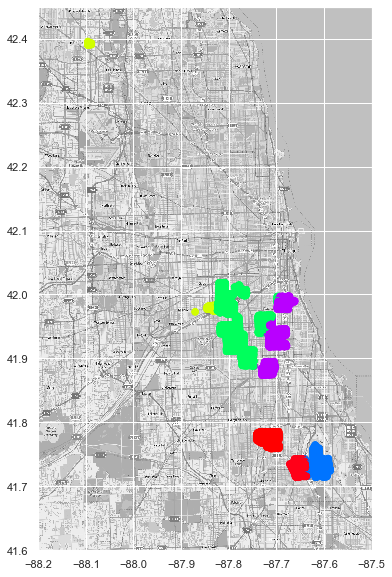

In [18]:
#location of clusters
plt.figure(figsize=(15,10))
lon_lat_box2 = (-88.2, -87.5, 41.6, 42.45)

plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box2, 
           aspect=aspect)
plt.scatter(spray['Longitude'],spray['Latitude'], c=spray['Cluster'], cmap='hsv');

In [19]:
# number of unique clusters formed 
spray['Cluster'].value_counts()

2    6957
4    3240
5    1394
0    1371
3     994
1     338
Name: Cluster, dtype: int64

In [20]:
#spray has only few dates in the dataframe ,storing all unique dates in a list 
#with unique location cluster on the same date
date_list=spray['Date'].unique()
len=spray['Date'].nunique()
cluster_list={}
for i in range(0,len):
    #print(date_list[i])
    cluster_list[date_list[i]]=(spray[spray['Date']==date_list[i]].Cluster.unique())

In [21]:
#removing unwanted characters and storing data in a dictionary format
final={}
for k in cluster_list:
    #print(cluster_list[k])
    temp=cluster_list[k]
    #print(temp)
    
    k=str(k).replace('T00:00:00.000000000','')
    final[k]=temp
    #print(k)

In [22]:
# unique dates with location of spray (cluster)
final

{'2011-08-29': array([1], dtype=int64),
 '2011-09-07': array([2, 1], dtype=int64),
 '2013-07-17': array([2, 1, 5, 3], dtype=int64),
 '2013-07-25': array([2, 4], dtype=int64),
 '2013-08-08': array([4], dtype=int64),
 '2013-08-15': array([2, 4], dtype=int64),
 '2013-08-16': array([2], dtype=int64),
 '2013-08-22': array([4, 3], dtype=int64),
 '2013-08-29': array([0, 2, 4], dtype=int64),
 '2013-09-05': array([2, 1], dtype=int64)}

In [23]:
#creating a column in spray and intializing it with zero
df['spray']=0

In [24]:
# manually marking the spray data to be 1(as its a categorical column 1- spray 0- No spray) 
# based on month and clusters 
# marking spray location of 2011
df['spray'].loc[((df['month']==8)&(df['year']==2011))&((df['Cluster']==5)|(df['Cluster']==2))]=1
df['spray'].loc[((df['month']==9)&(df['year']==2011))&(df['Cluster']==2)]=1

In [25]:
# marking spray location of 2013
df['spray'].loc[((df['month']==6)&(df['year']==2013))&((df['Cluster']==2)|(df['Cluster']==2))]=1
df['spray'].loc[((df['month']==9)&(df['year']==2013))&((df['Cluster']==0)|(df['Cluster']==5)|(df['Cluster']==1)|(df['Cluster']==4))]=1
df['spray'].loc[((df['month']==8)&(df['year']==2013))&(df['Cluster']==0)|(df['Cluster']==2)|(df['Cluster']==5)|(df['Cluster']==3)|(df['Cluster']==1)]=1

In [26]:
# no of locations sprayed 
df['spray'].value_counts()

1    2495
0    1290
Name: spray, dtype: int64

In [27]:
# One hot encoding on the following column to create dummy variables
df=pd.get_dummies(df,columns=['Species','Cluster','month','year'],drop_first=True)

In [28]:
df.head(1)

,Date,Address,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,Station,NumMosquitos,WnvPresent,Sunrise,Sunset,CodeSum,ResultDir,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,AvgSpeed,day,spray,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,month_7,month_8,month_9,year_2013
4690,2011-06-10,"1100 West Chicago Avenue, Chicago, IL 60642, USA",11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,2,1,0,-,-,TS TSRA BR HZ,1,74.4,55.0,65.0,1.066667,53.233333,58.0,4.933333,4.933333,0.0,0.288333,29.244333,29.894,9.17,10.493333,10,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


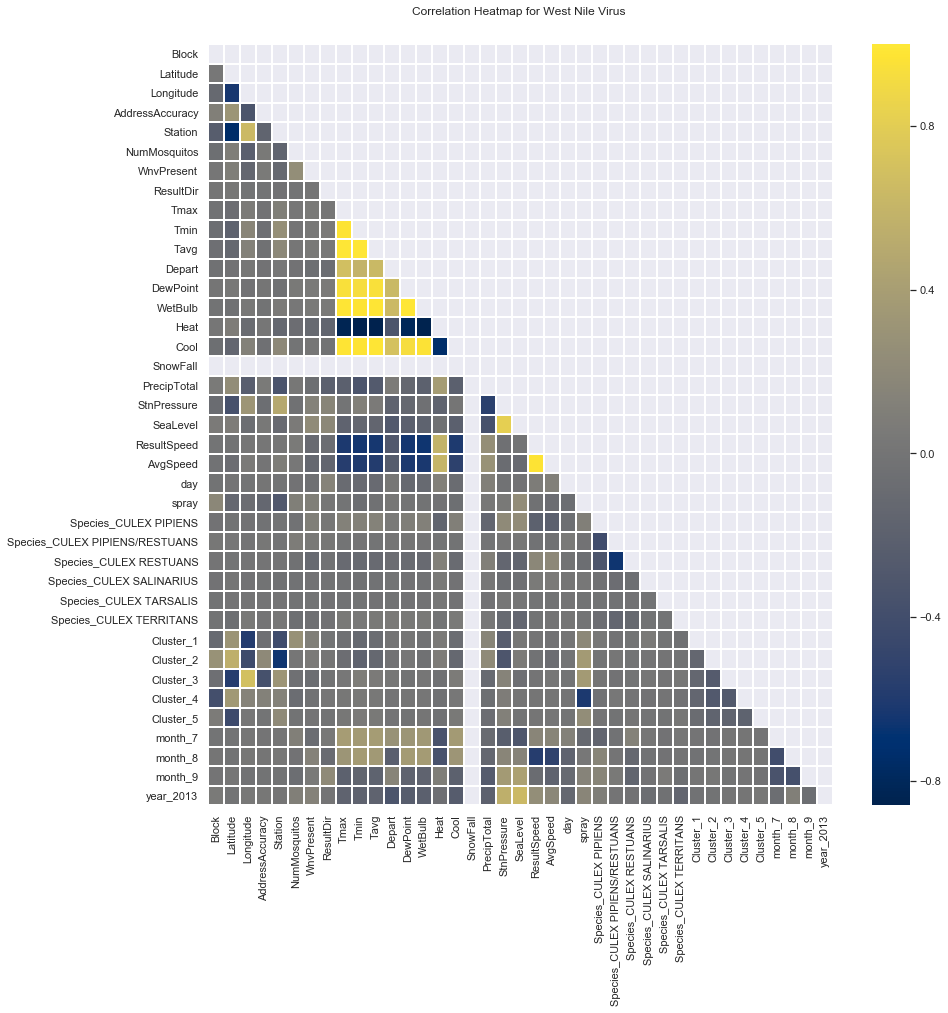

In [29]:
#correlation map of all the columns

#Seaborn Heatmap visualizes correlation between all numeric features
fig = plt.figure(figsize=(14,14))
ax = plt.axes()
ax.set_title('Correlation Heatmap for West Nile Virus \n\n');

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(df.corr(),cmap='cividis',linecolor='white',linewidth=1,mask=mask)
    


In [30]:
# dropping columns 
# snowfall has no value 
# 'Longitude','Latitude','Station' is related to location 
# remaining columns are multi collinear

df.drop(columns=['SnowFall','Longitude','Latitude','Station','Tmax','Tmin','WetBulb','DewPoint','Heat','Cool','ResultSpeed','AvgSpeed','StnPressure','Block','AddressAccuracy','PrecipTotal','Cluster_4','Species_CULEX PIPIENS/RESTUANS','SeaLevel','day'],inplace=True)

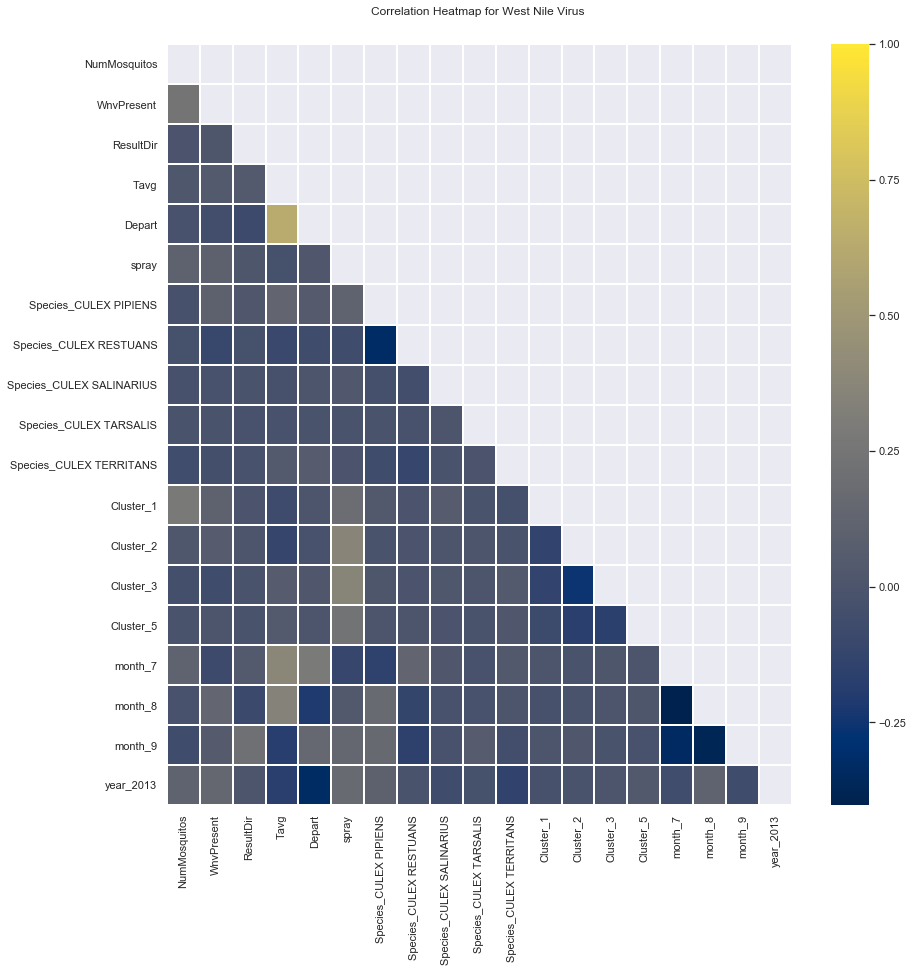

In [31]:
fig = plt.figure(figsize=(14,14))
ax = plt.axes()
ax.set_title('Correlation Heatmap for West Nile Virus \n\n');

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(df.corr(),cmap='cividis',linecolor='white',linewidth=1,mask=mask)

In [32]:
# Sorting the dataframe by date 
df.sort_values(by='Date',inplace=True)

In [33]:
#features for the model
features = ['NumMosquitos',
 'ResultDir',
 'Tavg',
 'Depart',
 'spray',
 'Species_CULEX PIPIENS',
 'Species_CULEX RESTUANS',
 'Species_CULEX SALINARIUS',
 'Species_CULEX TARSALIS',
 'Species_CULEX TERRITANS',
 'Cluster_1',
 'Cluster_2',
 'Cluster_3',
 'Cluster_5']

# Modeling

In [34]:
# defining X and y
X = df[features]
y = df['WnvPresent']

In [35]:
# Spliting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.10)

In [36]:
#fitting a `StandardScaler` to `X_train` and use it to transform both `X_train` and `X_test`

ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [37]:
# Instantiating  model.
logreg = LogisticRegression()

In [38]:
# Fitting model.
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
print(f'Logistic Regression Intercept: {np.exp(logreg.intercept_)}')
print(f'Logistic Regression Coefficient: {np.exp(logreg.coef_)}')

Logistic Regression Intercept: [0.13122737]
Logistic Regression Coefficient: [[1.01588303 0.99939281 0.98481799 0.90254165 3.50848109 1.69737477
  0.35375865 0.61150044 0.92855868 0.30076084 0.59706534 0.67738974
  0.27241844 0.41402707]]


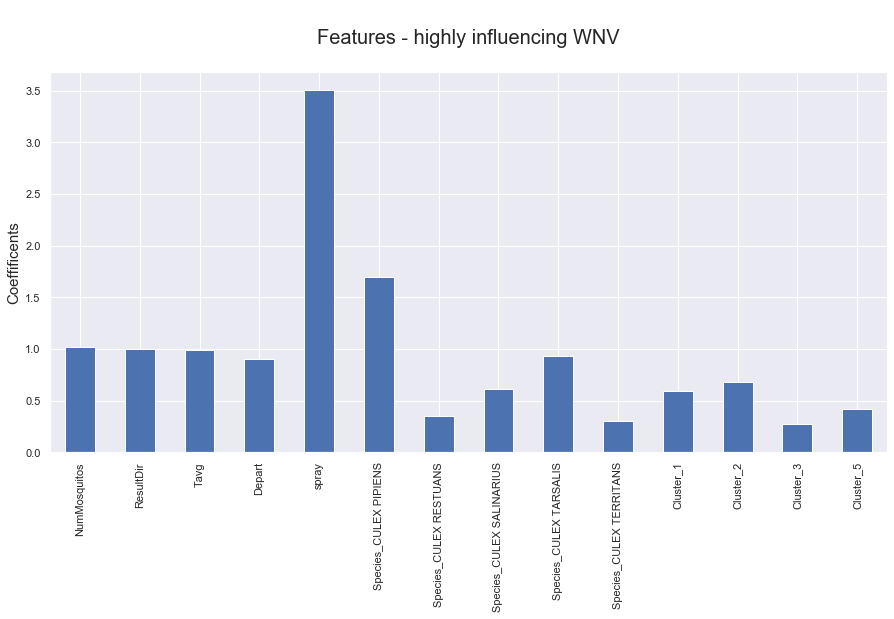

In [40]:
#Coefficients of features
plt.title(' \nFeatures - highly influencing WNV\n',fontsize=20);
pd.Series(np.exp(logreg.coef_)[0],index=features).plot.bar(figsize=(15, 7))
plt.ylabel('Coeffificents', fontsize=15);

In [47]:
#calculating the area of one unit in cluster graph
R=6371
 # approximate radius of earth in km
for i in range(0,len):
    lat1 = radians(-87.80)
    lon1 = radians(41.80)
    lat2 = radians(-87.80)
    lon2 = radians(41.70)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    length = R * c
    lat1 = radians(-87.70)
    lon1 = radians(41.70)
    lat2 = radians(-87.80)
    lon2 = radians(41.70)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    b = R * c
    area = length * b * 6
    acre=area*247.105 # converting the area in acre
extra_spray=area*16 # 16 units are sprayed which dosenot have mosquitos and WNV
cost_unwanted=extra_spray*1.5*0.0078125*83.40
gallons=1.5*acre*0.0078125 #( per acre needs 1.5 fluid ounce of pesticide,converting fluid ounce to gallons)
total_cost=gallons*83.40 # cost of per gallon is $83.40
print("Total cost of Mosquito Control Spray is  "+str(round(total_cost,2))+" for "+str(round(acre,2))+" acres ")
print("Total cost of Mosquito Control Spray in unwanted locations approximately is  "+str(round(cost_unwanted,2)))

Total cost of Mosquito Control Spray is  6877.7 for 7037.14 acres 
Total cost of Mosquito Control Spray in unwanted locations approximately is  445.33


# Conclusion

The above graph shows the various features and their correlation with West Nile virus. Based on correlation, the number of mosquitoes is 1 times as likely to detect virus. However, it is surprising to see that from the data given, spraying does not have a significant impact on virus detection. Maybe there are other carriers of West Nile virus such as birds which do not get affected due to the spray done on land.

The dataset provided gives information on different set of locations (in terms of latitude and longitude) for Spray and trap. This makes it difficult to identify the mosquito trap where virus is detected was sprayed. More information on county-wise spray and trap locations might be helpful in analysing the relationship between spray and virus detection. 

The product used to control the adult mosquitoes in Chicago, Zenivex™, is applied at a rate of 1.5 fluid ounces per acre. It is approved for use by the U.S. Environmental Protection Agency and is used to control mosquitoes in outdoor residential and recreational areas.

**As per our calculations, the total estimated cost for Mosquito control spray is $6877.7 for an estimated area of 7037.14 acres.**

The benefit could be in terms of a decrease in the number of mosquitoes post-spray. Also, significant number of deaths are caused because of West Nile Virus in Chicago. The city is ranked fourth in 2019 in a list of metro areas as one of the Mosquito Hot Spots in the nation (https://patch.com/illinois/chicago/chicagos-mosquito-problem-among-worst-nation).   
![mosquitos](../img/Mosquito_Hot_Spots.png)
The benefit can also be measured in terms of savings in the medical expenses, as fewer people will be infected with mosquitos, people taking few or no medical leaves, among others. **A typical household with employer health coverage spends about USD 800 a year in out-of-pocket costs, not counting premiums, according to research from the Commonwealth Fund. At the high end of the range, those costs can top USD 5,000 a year** (https://www.chicagobusiness.com/health-care/health-insurance-costs-surpass-20000-year-hitting-record).   




